# Лабораторная работа №3: "Регрессионный анализ"
Выполнил студент гр. 1384 Белокобыльский Илья. Вариант №2

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе

## Основные теоретические положения

**Линейная регрессия** некоторой зависимой переменной $y$ на наборе независимых переменных $x = (x_1, …, x_n)$ предполагает, что линейное отношение между $y$ и $x$: $y = \beta_0  + \beta_1 x_1 + ⋯ + \beta_n x_n + \epsilon$ - уравнение регрессии. $\beta_0, \beta_1, …, \beta_n$ – параметры регрессии, а $\epsilon$ – ошибка.

**Несмещённая оценка дисперсии** $s^2$
$$
s^2 = \frac{SS_{e}}{n-r} = \frac{\mathop{\mathrm{RSS}}(\hat{\beta})}{n-r}
\\
SS_{e}=RSS(\hat{\beta})
\\
r = \mathop{\mathrm{rank}}(X)
$$

**Метод Наименьших Квадратов**
$$
\mathop{\mathrm{RSS}}(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to \min\beta
$$
*Нормальные уравнения*: $XX^{\intercal}\beta=XY$
Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^{\intercal})^{-1}XY$
$$
\mathop{\mathrm{RSS}}(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}
\\
\frac{\partial \mathop{\mathrm{RSS}}}{\partial \beta_{k}} = -2\sum_{i=1}^{n}x_{ki}\left(Y_{i}- \sum_{j=1}^{m}x_{ji}\beta_{j}\right)=0, k=1...m
$$

**Доверительный интервал**
ДНО-функция: $\psi=C^{\intercal}\beta$
МНК-оценка: $\hat{\psi}=C^{\intercal}\beta$
Элемент дисперсии оценки: $b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$\
Распределение $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^{2}b)$\
$$ 
\frac{\hat{\psi}-\psi}{S\sqrt{b}} \sim \mathcal{S}_{n-r}
$$
Доверительный интервал уровня доверия $1-\alpha: \left[ \hat{\psi} - x_{\alpha}S\sqrt{b},\hat{\psi} + x_{\alpha}S\sqrt{b} \right]$, где $x_{\alpha}: \mathcal{S}_{n-r}(x_{\alpha})=1-\frac{\alpha}{2}$

**Уравнение доверительного эллипсоида**
$$
A_{\alpha}=\left\{ \vec{x}:(\vec{x}-\hat{\psi})^{\intercal}B^{-1}(\vec{x}-\hat{\psi}) \le qs^{2}x_{\alpha} \right\}
$$
$\hat{\psi}$ - вектор оценок параметров, $B$ - матрица оценок ковариации, $s^{2}$ - оценка дисперсии, $q$ - пороговая точка, связанная с распределением $\chi^2_{n-r}$, $x_{\alpha}$ - значение функции распределения $\chi^2_{n-r}$ и уровнем доверия $1-\alpha$


## Постановка задачи

Для полученных в результате эксперимента наборов данных необходимо оценить характер (случайной) зависимости переменной Y от переменной X.

## Выполнение работы

In [114]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(
    [1, 4, 5, 5, 0, 0, 5, 6, 5, 6, 7, 2, 2, 3, 3, 4, 0, 1, 3, 5, 0, 4, 6, 5, 0, 2, 1, 3, 6, 3, 4, 1, 7, 7, 1, 2, 0, 0,
     6, 7, 6, 1, 1, 6, 1, 1, 7, 6, 1, 6])
Y = np.array(
    [9.81, 4.73, 5.83, 6.85, 15.03, 18.45, 20.10, 12.84, 9.69, 8.83, 18.03, 10.45, 2.50, 3.53, 1.72, 8.92, 12.54, 5.30,
     17.56, 9.55, 7.71, 8.06, 4.98, 17.39, 7.20, 17.97, 0.25, 8.84, 7.63, 3.48, 10.97, 13.63, 13.94, 0.50, 4.18, 6.12,
     3.48, 13.90, 15.75, 2.05, 10.76, 13.05, 10.05, 2.56, 12.21, 0.38, 7.31, 6.66, 7.97, 4.04])
h = 2.5
alpha = 0.01

### Задание 1

Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y от переменной X. Построить МНК оценки параметра сдвига $\beta_0$ и $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

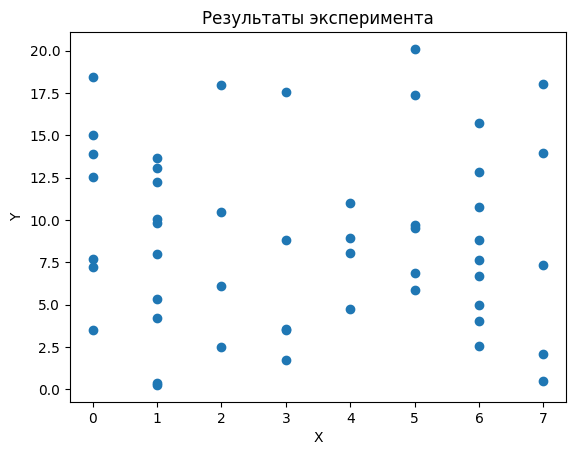

In [115]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты эксперимента')
plt.show()

Линейная регрессионная модель: 
$$
Y = \beta_0 + \beta_1X + \epsilon, где\ \epsilon - ошибка,\ \beta_0 - сдвиг,\ \beta_1 - масштаб
$$

$\hat{\beta_0}$ и $\hat{\beta_1}$ (оценки соответствующих параметров) вычисляются с помощью нормальных уравнений: 
$$
XX^{\intercal} \beta = XY
\\
\hat{\beta} = (XX^{\intercal})^{-1}XY
$$


In [116]:
matrixX = np.array([[1.0] * len(X), X])
XXT = np.dot(matrixX, matrixX.T)
XXT_inv = np.linalg.inv(XXT)
beta = np.dot(np.dot(XXT_inv, matrixX), Y)
print("Beta", beta)

Beta [ 9.19528046 -0.08621442]


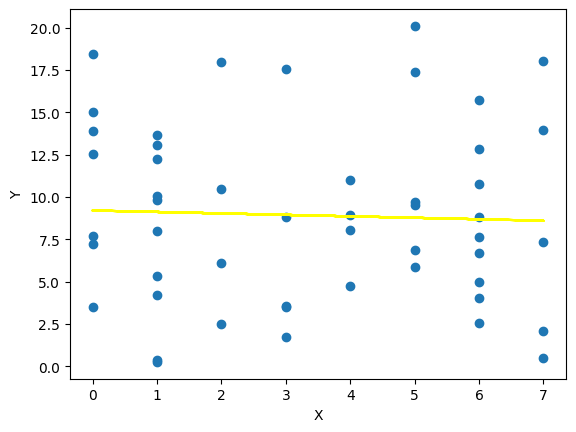

In [117]:
plt.plot(X, Y, 'o', label='Квадратичная регрессионная модель')

predY = np.dot(matrixX.T, beta)
plt.plot(X, predY, color='yellow',)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Визуально оценка проходит через диапазон результатов эксперимента, таким образом, соответствует полученным данным.

## Задание 2
Построить и интерпретировать несмещенную оценку дисперсии. На базе оибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости по $\alpha$ и $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Оценка параметра $\sigma^2$:
$$
s^2 = \frac{\mathop{\mathrm{RSS}}\left(\hat{\beta}\right)}{n-r} = \frac{1}{n-r} \sum_{i=1}^{n}\left(Y_i - \hat{\beta_0} - \hat{\beta_1}X_i\right)^2, где\  r = \mathop{\mathrm{rank}}(X) = 2
$$

In [118]:
RSS = np.sum((Y - beta[0] - beta[1] * X) ** 2)
varEst = RSS / (len(X) - len(matrixX))

print('Оценка дисперсии', varEst)

Оценка дисперсии 28.49922189601179


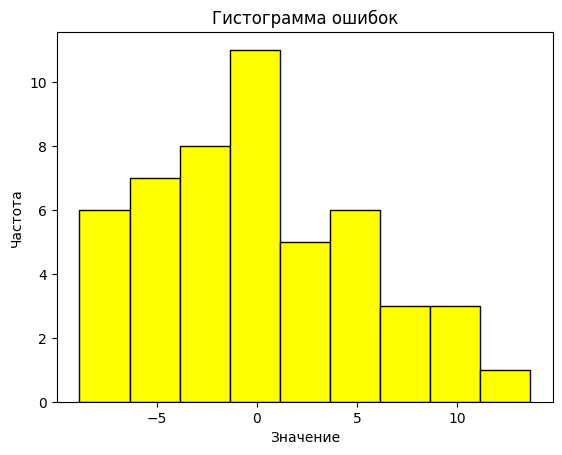

In [119]:
err = Y - predY
hist, bins, _ = plt.hist(err, bins=np.arange(min(err), max(err) + h, h), edgecolor='black', color='yellow')
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

In [120]:
for i in range(len(hist)):
    print('Интервал: (', round(bins[i], 4), round(bins[i + 1], 4), '), Количество чисел:', hist[i])

Интервал: ( -8.8591 -6.3591 ), Количество чисел: 6.0
Интервал: ( -6.3591 -3.8591 ), Количество чисел: 7.0
Интервал: ( -3.8591 -1.3591 ), Количество чисел: 8.0
Интервал: ( -1.3591 1.1409 ), Количество чисел: 11.0
Интервал: ( 1.1409 3.6409 ), Количество чисел: 5.0
Интервал: ( 3.6409 6.1409 ), Количество чисел: 6.0
Интервал: ( 6.1409 8.6409 ), Количество чисел: 3.0
Интервал: ( 8.6409 11.1409 ), Количество чисел: 3.0
Интервал: ( 11.1409 13.6409 ), Количество чисел: 1.0


Проверим гипотезу нормальности ошибок на уровне значимости $\alpha$.

Основная гипотеза: $H_0 \sim \mathcal{N}(0, \sigma^2)$

Объединим интервалы, чтобы в каждом было не менее 5 элементов:
$$
I_1 = (-\infty, -6.36], \ n_1 = 6
\\
I_2 = (-6.36, -3.86], \ n_2 = 7
\\
I_3 = (-3.86, -1.36], \ n_3 = 8
\\
I_{4} = (-1.36, 1.14], \ n_{4} = 11
\\
I_{5} = (1.14, 3.64], \ n_{5} = 5
\\
I_{6} = (3.64, 6.14], \ n_{6} = 6
\\
I_{7} = (6.14, +\infty), \ n_{7} = 7
$$

Статистика критерия: 
$$
\chi^2 = \sum_{j=1}^{k}\frac{(\nu_j - np_{jo})^2}{np_{j0}}
$$
k - количество интервалов, $\nu_i$ - абсолютная частота, $p_{j0} = \mathbb{P}(\xi \in I_i) = \left[ \text{Пусть a и b - границы интервала} \right] = F(b_i) - F(a_i)$ - вероятность попадания в интервал

$x_{\alpha}:$ $\mathcal{K}_{r-d-1}(x_a) = 1 - \alpha_1 = 1 - 0.01 = 0.99$

In [121]:
from scipy import stats
import scipy

cutBins = np.array([-6.36, -3.86, -1.36, 1.14, 3.64, 6.14])
cutFreq = np.array([6, 7, 8, 11, 5, 6, 7])

def chi2_sum(s, bins, freq):
    res = np.zeros(len(bins) + 1)
    for i in range(len(bins) + 1):
        if i < len(bins):
            res[i] = stats.norm.cdf(bins[i], 0, s)
        else:
            res[i] = 1
        if i > 0:
            res[i] -= stats.norm.cdf(bins[i - 1], 0, s)
    return np.sum(((freq - 50 * res) ** 2) / (50 * res))


chi2Res = scipy.optimize.minimize_scalar(lambda s: chi2_sum(s, cutBins, cutFreq))

print("Значение параметра", chi2Res.x)
print("X^2", chi2Res.fun)

x_alpha = stats.chi2.ppf(1 - alpha, len(cutBins) - 1)

print("x_alpha", x_alpha)
print('Принимается H0' if chi2Res.fun <= x_alpha else 'Отклоняется H0')
alpha_max = 1 - stats.chi2.cdf(chi2Res.fun, len(cutBins) - 1)
print("Гипотеза может быть принята, если уровень значимости <=", alpha_max)

Значение параметра 5.509360193293716
X^2 1.9382277494921694
x_alpha 15.08627246938899
Принимается H0
Гипотеза может быть принята, если уровень значимости <= 0.8576247042515572


Оценка расстояния до класса нормальных распределений по Колмогорову:
$$ 
\sqrt{n} \cdot \max|F_n(y) - F(y)| \sim K,\ где\ K\text{ - распределение Колмогорова.} 
$$

In [122]:
def build_Fn(x, values):
    sum = 0
    for i in values:
        if i >= x:
            return sum / len(X)
        sum += 1
    return sum / len(X)


errSort = np.sort(err)
X_steps = np.arange(min(err) - h, max(err) + h, h)
F = np.array([stats.norm.cdf(y, 0, np.sqrt(varEst)) for y in X_steps])
Fn = np.array([build_Fn(i, errSort) for i in X_steps])
Dn = np.max(np.abs(Fn - F)) * np.sqrt(len(X))
print('Dn', Dn)
x_alpha = stats.ksone.ppf(1 - alpha, len(X))
print('x_alpha', x_alpha)
print('Принимается H0' if Dn <= x_alpha else 'Отклоняется H0')
alpha_max = 1 - stats.ksone.cdf(Dn, len(X))
print("Гипотеза может быть принята, если уровень значимости <=", alpha_max)

Dn 0.39161645038173887
x_alpha 0.2106765432666897
Отклоняется H0
Гипотеза может быть принята, если уровень значимости <= 1.0127183258656913e-07


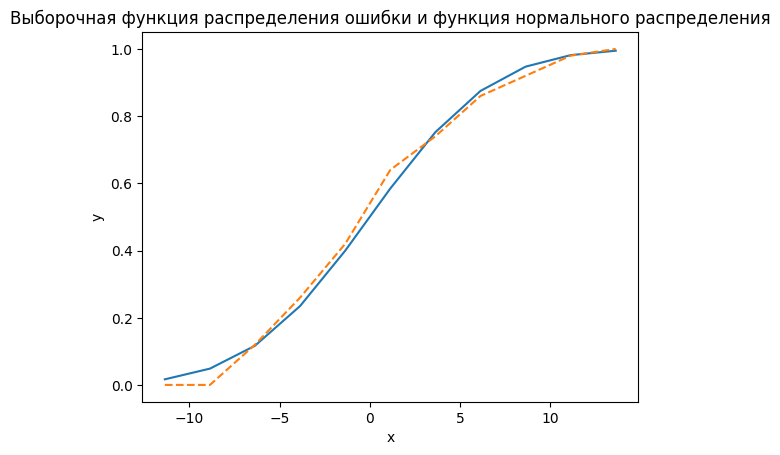

In [123]:
plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_steps, F)
plt.plot(X_steps, Fn, '--')
plt.show()

### Задание 3
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha$. Построить доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$. (вычислить его полуоси)

ДНО функция: $\psi = C^{\intercal}\beta$

Элемент дисперсии оценки: $b_\psi = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$
$$
\frac{\hat{\psi} - \psi}{s\sqrt{b}} \sim \mathcal{S}_{n-r}
$$
Доверительный интервал уровня доверия $1 - \alpha$:
$$
\mathbb{P}_\theta\left(-x_\alpha \le \cfrac{\hat{\psi} - \psi}{s\sqrt{b}} \le x_\alpha\right) = 1 -\alpha
x_\alpha : \mathcal{S}_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}
$$
Для $\beta_0:$

$$
\psi_{\beta_0} = \begin{pmatrix}
1 \\
0
\end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}
\\
b_{\psi_{\beta_0}} =  \begin{pmatrix}
1 & 0
\end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
1 \\ 0
\end{pmatrix}
$$

Для $\beta_1:$
$$
\psi_{\beta_1} = \begin{pmatrix}
0 \\
1
\end{pmatrix}  ^ {\intercal} \cdot  \begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}
\\
b_{\psi_{\beta_1}} =  \begin{pmatrix}
0 & 1
\end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
0 \\ 1
\end{pmatrix}
$$

In [124]:
print("x_alpha", stats.t.ppf(1 - alpha / 2, len(X) - 2))
C_0 = np.array([1, 0])
b_0 = np.dot(np.dot(C_0.T, XXT_inv), C_0)
C_1 = np.array([0, 1])
b_1 = np.dot(np.dot(C_1.T, XXT_inv), C_1)
beta_intervals = [
    [beta[0] - x_alpha * np.sqrt(varEst) * np.sqrt(b_0), beta[0] + x_alpha * np.sqrt(varEst) * np.sqrt(b_0)],
    [beta[1] - x_alpha * np.sqrt(varEst) * np.sqrt(b_1), beta[1] + x_alpha * np.sqrt(varEst) * np.sqrt(b_1)]
]
print("b_0", b_0)
print("b_1", b_1)
print(f'Доверительные интервалы', beta_intervals)

x_alpha 2.6822040269502136
b_0 0.05899419729206963
b_1 0.0034539928156949434
Доверительные интервалы [[8.922107740144373, 9.468453188288898], [-0.15231319726723308, -0.020115650480763983]]


Доверительный эллипс уровня доверия 1 - $\alpha$:
$$ A_\alpha = \{x: (x - \hat{\psi})^{\intercal} (C^{\intercal} (XX^{\intercal})^{-1}C)^{-1}(x - \hat{\psi}) \le qs^2x_\alpha\}
\\
x_\alpha: F_{q, n-r}(x_\alpha) = 1 - \alpha
\\
C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix}
$$
Пусть $\begin{pmatrix}
    x\\
    y
\end{pmatrix} = P(\hat{\psi} - \psi)$, где $P$ - матрица собственных векторов.

Пусть $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^{\intercal}$. Тогда уравнение эллипсоида примет вид:

$$
(\hat{\psi} -  \psi)^{\intercal} (C^{\intercal} (XX^{\intercal})^{-1}C)^{-1}(\hat{\psi} -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha
\\
\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1
$$

Матрица перехода [[-0.98047666 -0.19663548]
 [ 0.19663548 -0.98047666]]
Собственные числа [ 16.30744785 887.69255215]
x_alpha 5.07666380708612
Полуоси 4.212381551376231 0.5709386097206891


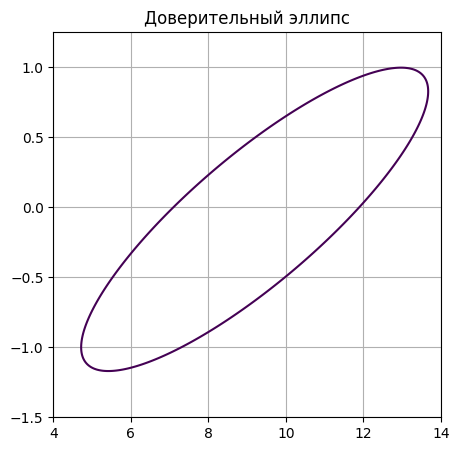

In [125]:
eigenvalues, eigenvectors = np.linalg.eig(XXT)
print('Матрица перехода', eigenvectors)
print('Собственные числа', eigenvalues)

x_alpha = stats.f.ppf(1 - alpha, 2, len(X) - 2)
print('x_alpha', x_alpha)

a = np.sqrt((2 * varEst * x_alpha) / eigenvalues[0])
b =  np.sqrt((2 * varEst * x_alpha) / eigenvalues[1])

print('Полуоси', a, b)
def build_ellipse(beta0, beta1):
    return (( eigenvectors[0][0] * (beta[0] - beta0) - eigenvectors[0][1] * (beta[1] - beta1))**2 / 
            a**2) + ((eigenvectors[1][0] * (beta[0] - beta0) + eigenvectors[1][1] * (beta[1] - beta1))**2 / b**2)

beta0, beta1 = np.meshgrid(np.linspace(4, 14, 300), np.linspace(-1.5, 1.25, 300))
z = build_ellipse(beta0, beta1)

fig = plt.figure(figsize=(5,5))
plt.contour(beta0, beta1, z, levels=[1])
plt.title('Доверительный эллипс')
plt.grid()

plt.show()

### Задание 4
Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

Основная гипотеза: $H_0: \beta_1 = 0$
Альтернативная: $H_1 : \beta_1 \neq 0$
F-статистика: $\mathbb{F} = \frac{\hat{\psi} B^{-1} \psi}{qs^2} \sim F_{q, n-r}$

Пусть $B = C^{\intercal} (XX^{\intercal})^{-1} C$

$x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha$

При основной гипотезе $C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} \Rightarrow \hat \psi = \hat \beta_1,\ q = 1$

$\mathbb{F} = \cfrac{{\hat \beta_1} ^2}{bqs^2} $

In [126]:
c = np.array([0, 1])
b = np.dot(np.dot(c.T, XXT_inv), c)
q = 1
F = beta[1] ** 2 / (b * q * varEst)
x_alpha = stats.f.ppf(1 - alpha, q, len(X) - len(matrixX))
print('b', b)
print('F', F)
print('x_alpha', x_alpha)
print('Принимается H0' if F <= x_alpha else 'Отклоняется H0')

b 0.0034539928156949434
F 0.07551016653318726
x_alpha 7.194218442187959
Принимается H0


### Задание 5
Сформулировать модель, включающую дополнительный член $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить полученную регрессионную зависимость.

Линейная регрессионная модель: 
$ Y = X^{\intercal} \beta + \epsilon$, где $\epsilon$ - ошибка, $\beta = (\beta_0, \beta_1, \beta_2)$ 
МНК оценка:
$$
\hat{\beta} = \left(XX^{\intercal}\right)^{-1}XY 
$$

In [127]:
matrixX = np.array([[1.0] * len(X), sorted(X), [x**2 for x in sorted(X)]])
XXT = np.dot(matrixX, matrixX.T)
XXT_inv = np.linalg.inv(XXT)
beta = np.dot(np.dot(XXT_inv, matrixX), Y)
print(beta)


[ 1.05847022e+01 -4.94778141e-01 -9.74689016e-04]


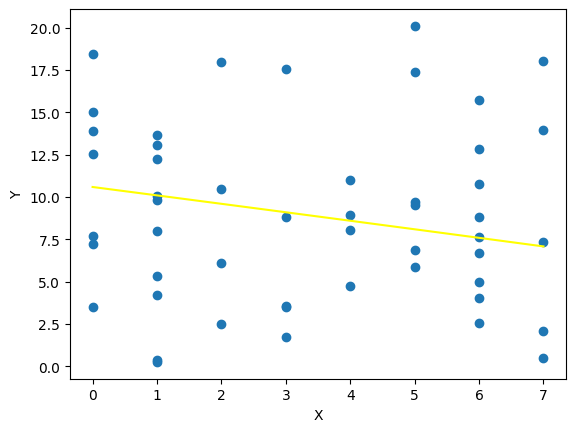

In [128]:
plt.plot(X, Y, 'o')

predY = np.dot(matrixX.T, beta)
plt.plot(sorted(X), predY,  color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### Задание 6
Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

$$
s^2 = \frac{1}{n-r} \cdot  (Y - X^{\intercal} \hat \beta)^{\intercal} (Y - X^{\intercal} \hat \beta)
\\
r = \mathop{\mathrm{rank}}(X) = 3
$$

In [129]:
RSS = np.sum((Y - beta[0] - beta[1] * X - beta[2] * X**2) ** 2)
varEst = RSS / (len(X) - len(matrixX))

print('Оценка дисперсии', varEst)

Оценка дисперсии 30.1708530327618


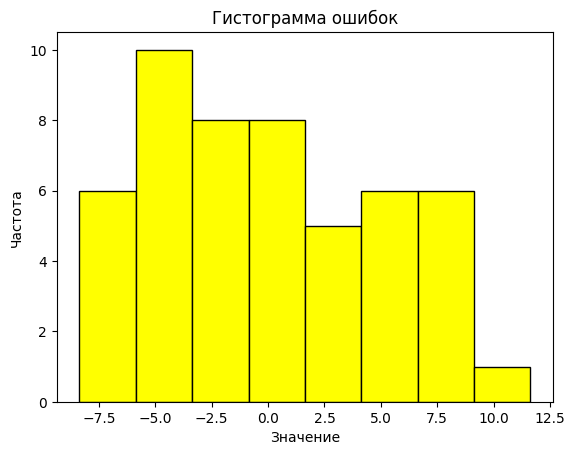

In [130]:
err = Y - predY
hist, bins, _ = plt.hist(err, bins=np.arange(min(err), max(err) + h, h), edgecolor='black', color='yellow')
plt.title('Гистограмма ошибок')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

In [131]:
plt.show()
for i in range(len(hist)):
    print('Интервал: (', round(bins[i], 4), round(bins[i + 1], 4), '), Количество чисел:', hist[i])

Интервал: ( -8.3689 -5.8689 ), Количество чисел: 6.0
Интервал: ( -5.8689 -3.3689 ), Количество чисел: 10.0
Интервал: ( -3.3689 -0.8689 ), Количество чисел: 8.0
Интервал: ( -0.8689 1.6311 ), Количество чисел: 8.0
Интервал: ( 1.6311 4.1311 ), Количество чисел: 5.0
Интервал: ( 4.1311 6.6311 ), Количество чисел: 6.0
Интервал: ( 6.6311 9.1311 ), Количество чисел: 6.0
Интервал: ( 9.1311 11.6311 ), Количество чисел: 1.0


Проверим гипотезу нормальности ошибок на уровне значимости $\alpha$.

Основная гипотеза: $H_0 \sim \mathcal{N}(0, \sigma^2)$

Объединим интервалы, чтобы в каждом было не менее 5 элементов:
$$
I_1 = (-\infty, -5.87], \ n_1 = 6
\\
I_2 = (-5.87, -3.69], \ n_2 = 10
\\
I_3 = (-3.69, -0.87], \ n_3 = 8
\\
I_{4} = (-0.87, 1.63], \ n_{4} = 8
\\
I_{5} = (1.63, 4.13], \ n_{5} = 5
\\
I_{6} = (4.13, 6.63), \ n_{6} = 6
\\
I_{7} = (6.63, +\infty), \ n_{7} = 7
$$

Статистика критерия: 
$$
\chi^2 = \sum_{j=1}^{k}\frac{(\nu_j - np_{jo})^2}{np_{j0}}
$$
k - количество интервалов, $\nu_i$ - абсолютная частота, $p_{j0} = \mathbb{P}(\xi \in I_i) = \left[ \text{Пусть a и b - границы интервала} \right] = F(b_i) - F(a_i)$ - вероятность попадания в интервал

$x_{\alpha}:$ $\mathcal{K}_{r-d-1}(x_a) = 1 - \alpha_1 = 1 - 0.01 = 0.99$

In [132]:
from scipy import stats
import scipy

cutBins = np.array([-5.87, -3.69, -0.87, 1.63, 4.13, 6.63])
cutFreq = np.array([6, 10, 8, 8, 5, 6, 7])

chi2Res = scipy.optimize.minimize_scalar(lambda s: chi2_sum(s, cutBins, cutFreq))

print("Значение параметра", chi2Res.x)
print("X^2", chi2Res.fun)

x_alpha = stats.chi2.ppf(1 - alpha, len(cutBins) - 1)

print("x_alpha", x_alpha)
print('Принимается H0' if chi2Res.fun <= x_alpha else 'Отклоняется H0')
alpha_max = 1 - stats.chi2.cdf(chi2Res.fun, len(cutBins) - 1)
print("Гипотеза может быть принята, если уровень значимости <=", alpha_max)

Значение параметра 5.7476757552467
X^2 5.5910746755880325
x_alpha 15.08627246938899
Принимается H0
Гипотеза может быть принята, если уровень значимости <= 0.34806252694397044


Оценка расстояния до класса нормальных распределений по Колмогорову:
$$ 
\sqrt{n} \cdot \max|F_n(y) - F(y)| \sim K,\ где\ K\text{ - распределение Колмогорова.} 
$$

In [133]:
errSort = np.sort(err)
X_steps = np.arange(min(err) - h, max(err) + h, h)
F = np.array([stats.norm.cdf(y, 0, np.sqrt(varEst)) for y in X_steps])
Fn = np.array([build_Fn(i, errSort) for i in X_steps])
Dn = np.max(np.abs(Fn - F)) * np.sqrt(len(X))
print('Dn', Dn)
x_alpha = stats.ksone.ppf(1 - alpha, len(X))
print('x_alpha', x_alpha)
print('Принимается H0' if Dn <= x_alpha else 'Отклоняется H0')
alpha_max = 1 - stats.ksone.cdf(Dn, len(X))
print("Гипотеза может быть принята, если уровень значимости <=", alpha_max)

Dn 0.45114558306846275
x_alpha 0.2106765432666897
Отклоняется H0
Гипотеза может быть принята, если уровень значимости <= 4.1286074559110375e-10


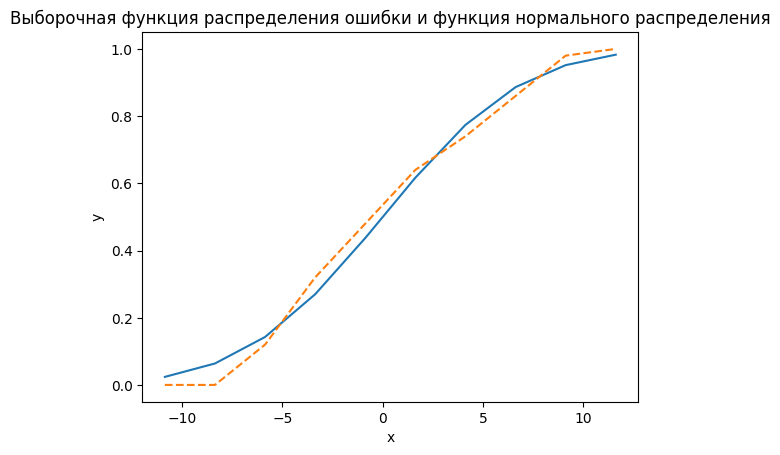

In [134]:
plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X_steps, F)
plt.plot(X_steps, Fn, '--')
plt.show()

### Задание 7
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия 1 − $\alpha$. Написать уравнение доверительного эллипсоида уровня доверия 1 − $\alpha$.

ДНО функция: $\psi = C^{\intercal}\beta$

Элемент дисперсии оценки: $b_\psi = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$
$$
\frac{\hat{\psi} - \psi}{s\sqrt{b}} \sim \mathcal{S}_{n-r}
$$
Доверительный интервал уровня доверия $1 - \alpha$:
$$
\mathbb{P}_\theta\left(-x_\alpha \le \cfrac{\hat{\psi} - \psi}{s\sqrt{b}} \le x_\alpha\right) = 1 - \alpha
\\
x_\alpha : \mathcal{S}_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}
$$

Для $\beta_0:$
$$
\psi_{\beta_0} = \begin{pmatrix}
1 \\
0 \\
0
\end{pmatrix} ^ {\intercal} \cdot \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix}
\\
b_{\psi_{\beta_0}} = \begin{pmatrix}
1 & 0 & 0
\end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}
$$

Для $\beta_1:$
$$
\psi_{\beta_1} = \begin{pmatrix}
0 \\
1 \\
0
\end{pmatrix} ^ {\intercal} \cdot \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix}
\\
b_{\psi_{\beta_1}} = \begin{pmatrix}
0 & 1 & 0
\end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix}
$$

Для $\beta_2:$
$$
\psi_{\beta_2} = \begin{pmatrix}
0 \\
0 \\
1
\end{pmatrix} ^ {\intercal} \cdot \begin{pmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{pmatrix}
\\
b_{\psi_{\beta_2}} = \begin{pmatrix}
0 & 0 & 1
\end{pmatrix} (XX^{\intercal})^{-1} \begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
$$



In [135]:
print("x_alpha", stats.t.ppf(1 - alpha / 2, len(X) - 2))
C_0 = np.array([1, 0, 0])
b_0 = np.dot(np.dot(C_0.T, XXT_inv), C_0)
C_1 = np.array([0, 1, 0])
b_1 = np.dot(np.dot(C_1.T, XXT_inv), C_1)
C_2 = np.array([0, 0, 1])
b_2 = np.dot(np.dot(C_2.T, XXT_inv), C_2)
beta_intervals = [
    [beta[0] - x_alpha * np.sqrt(varEst) * np.sqrt(b_0), beta[0] + x_alpha * np.sqrt(varEst) * np.sqrt(b_0)],
    [beta[1] - x_alpha * np.sqrt(varEst) * np.sqrt(b_1), beta[1] + x_alpha * np.sqrt(varEst) * np.sqrt(b_1)],
    [beta[2] - x_alpha * np.sqrt(varEst) * np.sqrt(b_2), beta[2] + x_alpha * np.sqrt(varEst) * np.sqrt(b_2)]
]
print("b_0", b_0)
print("b_1", b_1)
print("b_2", b_2)
print(f'Доверительные интервалы', beta_intervals)

x_alpha 2.6822040269502136
b_0 0.09669009259995792
b_1 0.05524919113008698
b_2 0.0011157995864851044
Доверительные интервалы [[10.224869261781876, 10.944535223738558], [-0.766780669359573, -0.22277561300214377], [-0.039629457516273364, 0.0376800794843585]]


Доверительный эллипсоид уровня доверия 1 - $\alpha$
$$
A_\alpha = \{x: (x - \hat{\psi})^{\intercal} (C^{\intercal} (XX^{\intercal})^{-1}C)^{-1}(x - \hat{\psi}) \le qs^2x_\alpha\}
\\
x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha
\\
C = \begin{pmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1
\end{pmatrix}
$$

Пусть $ \begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix} = P(\hat{\psi} - \psi)$, где $P$ - матрица собственных векторов.

Пусть $\lambda_1$, $\lambda_2$ и $\lambda_3$ - собственные числа матрицы $XX^{\intercal}$. Тогда уравнение эллипсоида примет вид:
$$
(\hat{\psi} -  \psi)^{\intercal} (C^{\intercal} (XX^{\intercal})^{-1}C)^{-1}(\hat{\psi} -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2 \le qs^2x_\alpha
\\
\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 + \cfrac{\lambda_3}{qs^2x_\alpha}z^2 \le 1
$$

In [136]:
eigenvalues, eigenvectors = np.linalg.eig(XXT)
print('Матрица перехода', eigenvectors)
print('Собственные числа', eigenvalues)

x_alpha = stats.f.ppf(1 - alpha, 2, len(X) - 2)
print('x_alpha', x_alpha)

a = np.sqrt((2 * varEst * x_alpha) / eigenvalues[0])
b =  np.sqrt((2 * varEst * x_alpha) / eigenvalues[1])
print('Полуоси', a, b)

Матрица перехода [[-0.02927203 -0.81806016 -0.57438725]
 [-0.16530537  0.57068295 -0.80436006]
 [-0.98580793 -0.07140405  0.15193479]]
Собственные числа [2.97592898e+04 7.34338112e+00 5.93668146e+01]
x_alpha 5.07666380708612
Полуоси 0.10145809721790838 6.458772092609307


### Задание 8
Сформулировать гипотезу линейной регрессинной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Основная гипотеза: $H_0: \beta_2 = 0$
Альтернативная: $H_1 : \beta_2 \neq 0$
F-статистика: $\mathbb{F} = \frac{\hat{\psi} B^{-1} \psi}{qs^2} \sim F_{q, n-r}$

Пусть $B = C^{\intercal} (XX^{\intercal})^{-1} C$

$x_{\alpha}: F_{q,n-r}(x_{\alpha}) = 1 - \alpha$

При основной гипотезе $C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} \Rightarrow \hat \psi = \hat \beta_2,\ q = 1$

$\mathbb{F} = \cfrac{{\hat \beta_2} ^2}{bqs^2} $

In [137]:
c = np.array([0, 0, 1])
b = np.dot(np.dot(c.T, XXT_inv), c)
q = 1
F = beta[2] ** 2 / (b * q * varEst)
x_alpha = stats.f.ppf(1 - alpha, q, len(X) - len(matrixX))
print('b', b)
print('F', F)
print('x_alpha', x_alpha)
print('Принимается H0' if F <= x_alpha else 'Отклоняется H0')

b 0.0011157995864851044
F 2.8220087652652264e-05
x_alpha 7.2068388654187014
Принимается H0


## Выводы
В ходе проделанной лабораторной работы были получены практические навыки применения метода наименьших квадратов. Построена и проанализирована модель линейной регрессии, на основе которой была получена МНК оценка. Были построены линейная и квадратичная регрессионные модели. Проведен анализ нормальности их ошибок, построены доверительные интервалы и эллипсы, проверены гипотезы.
